# Estableciendo relaciones: Análisis de regresión simple

### Análisis de regresión
¿Cómo calcular la fuerza del efecto?

Tenemos nuestro conjunto de datos en el cual hacemos una comparación de la longitud de las alas vs la cantidad de masa del cuerpo, encontramos que existía una correlación alta, de aproximadamente 0.87. Pero ¿esto me dice algo, que tan fuertemente están relacionadas y cuál es el efecto?

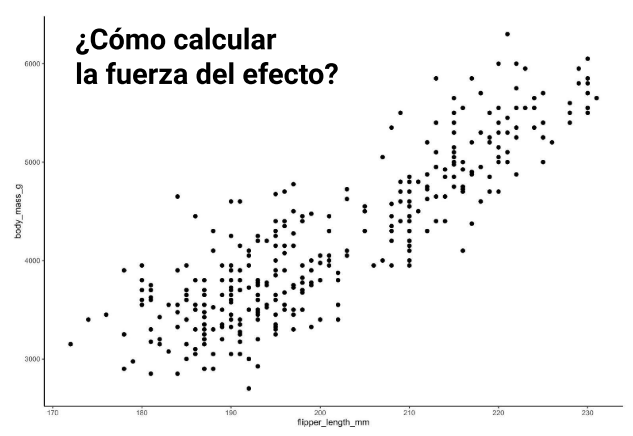

Para esto tenemos que hablar sobre la regresión lineal, es decir ajustar una linea a nuestros datos de tal forma que nosotros podamos simbolizar el conjunto con está gráfica o función lineal, así podemos calcular sus parámetros. Algo importante a resaltar es el concepto de "pendiente o slope", este parámetro nos indica que tan rápido es el crecimiento de la función.

Entonces la **pendiente** nos va a indicar la fuerza del efecto, así cuantificamos la fuerza del efecto.

In [25]:
# Importando librerías 
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de las gráficas

In [26]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Datos Preprocesados

In [35]:
preprocessed_penguins_df = pd.read_csv('dataset/penguins.csv').dropna()

In [36]:
preprocessed_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


#### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


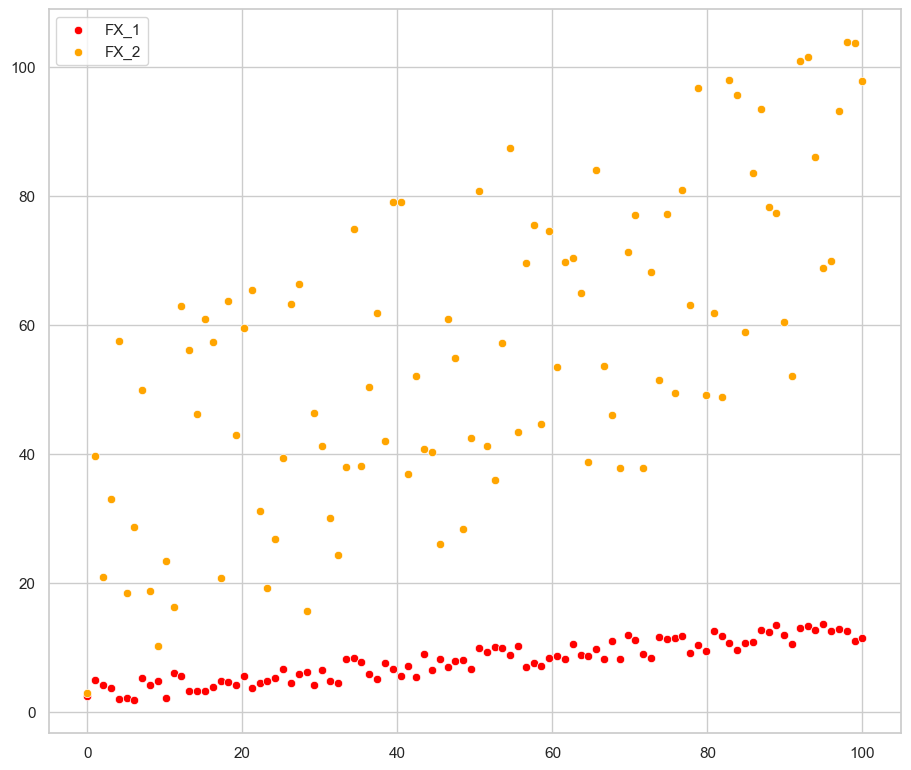

In [10]:
# Datos Rojos con pendiente positiva pequeña
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1,
    color='red'
)

# Datos Naranjas con pendiente positiva grande
x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2,
    color='orange'
)

plt.legend(labels=['FX_1', 'FX_2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

## Análisis de regresión simple

¿Cómo podemos ajustar los datos a una función para cuantificar el efecto?

In [8]:
res_1=scipy.stats.linregress(x=x_1,y=y_1)
res_2=scipy.stats.linregress(x=x_2,y=y_2)
print(f'Resultado 1 = {res_1}',f'Resultado 2 = {res_2}',sep='\n')

Resultado 1 = LinregressResult(slope=0.10081969280979616, intercept=2.8397383330230284, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
Resultado 2 = LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657528, pvalue=1.388369987899233e-14, stderr=0.060436575031364535, intercept_stderr=3.498107570885823)


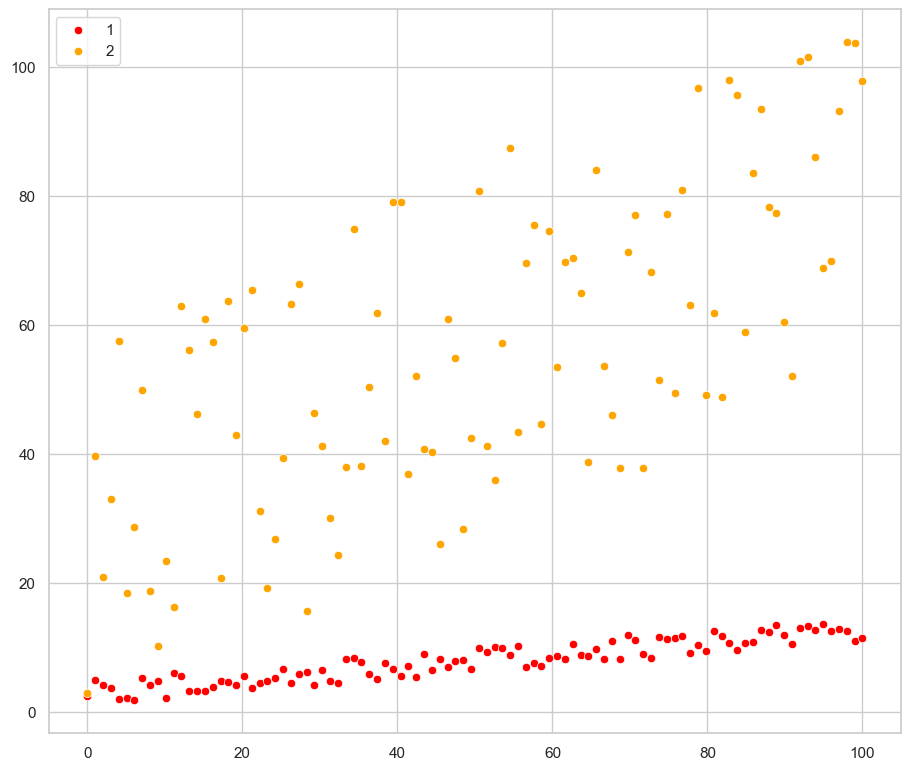

- El primer resultado corresponde a los datos rojos, son los que contienen una pendiente pequeña y su ritmo de crecimiento es lento.

- El segundo resultado corresponde a los datos en naranja, son datos más dispersos pero con un mayor grado de crecimiento, gracias a su pendiente.

El resultado nos da 2 parámetros:
- pendiente (slope)
- ordenada al origen (intercept)

Vemos que los datos son diferentes y recordando el análisis de la clase pasada en donde el conjunto de datos en rojo tenía un mayor coeficiente de correlación; aquí en este caso posee un intercepto, ordenada al origen o bias menor, y también nos arroja una pendiente menor.

En el caso de los datos en naranja, el coeficiente de relación era pequeño porque los datos eran muy dispersos, pero obteniendo sus parámetros son mayores que los de los datos en rojo:

$$\footnotesize{}
\begin{array}{ll}
\text{Datos en rojo}\\\\
\text{Pendiente} & \text{Intersección} \\
0.1008 & 2.8397
\\\\
\text{Datos en naranja}\\\\
\text{Pendiente} & \text{Intersección} \\
0.5470 & 28.5198
\end{array}
$$

 También tenemos un parámetro $r$ que nos indica cuanta de la variabilidad de nuestros datos estamos capturando con la regresión lineal. Además este se relación con el **coeficiente de relación.**

Vamos a graficar el resultado

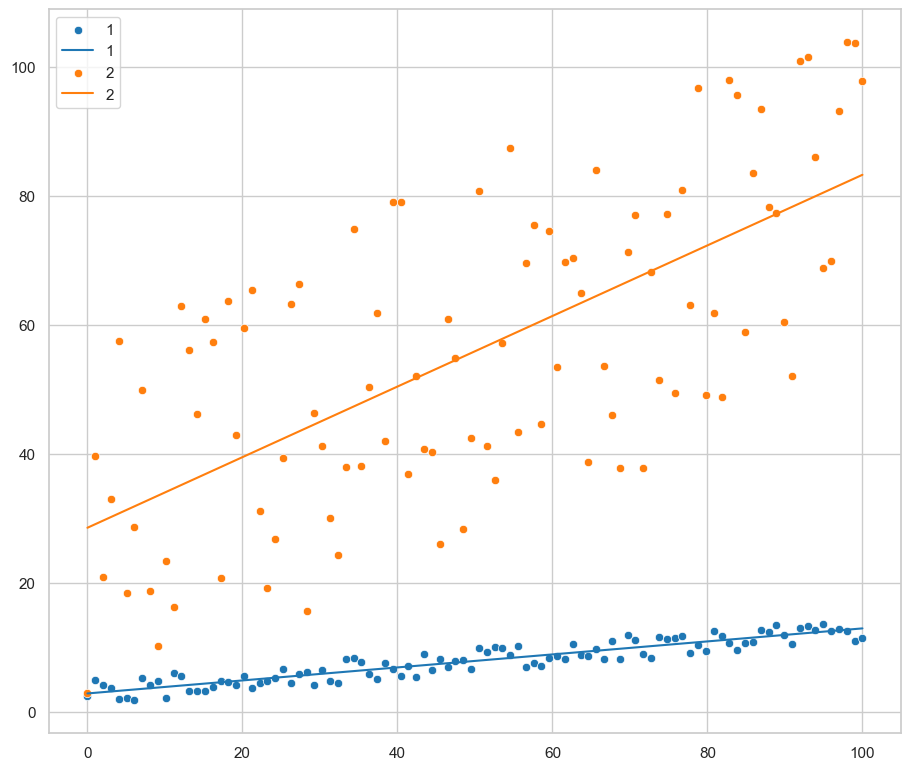

In [11]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 =  res_1.intercept + res_1.slope *  fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res_2.intercept + res_2.slope *  fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

In [12]:
for columna in preprocessed_penguins_df.columns:
    print(columna)

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
year


<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

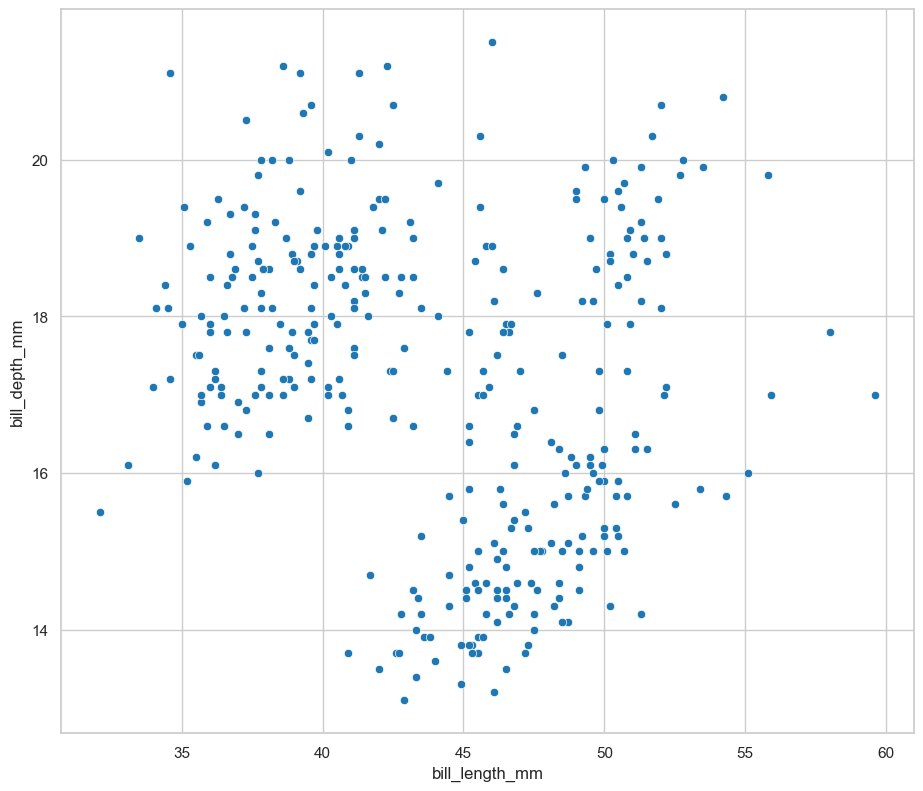

In [13]:
sns.scatterplot(
    data=preprocessed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

Vamos a pasarle los datos de las columnas anteriores, para encontrar un modelo.

In [37]:
preprocessed_penguins_df= preprocessed_penguins_df.dropna()
preprocessed_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [39]:
lin_par = scipy.stats.linregress(
    x=preprocessed_penguins_df.bill_length_mm,
    y=preprocessed_penguins_df.bill_depth_mm
)
#Desplegando los datos de la regresión lineal
lin_par

LinregressResult(slope=-0.08232675339862278, intercept=20.78664866843383, rvalue=-0.22862563591302903, pvalue=2.5282897209443286e-05, stderr=0.019268346735778867, intercept_stderr=0.8541730787409806)

Cómo se puede ver en los parámetros anteriores tenemos:
- pendiente: -0.082
- intersección: 20.787

Entonces la forma gráfica es diferente e indicaría una linea en decrecimiento, lo que significa que un cambio positivo en X es un cambio negativo en Y.

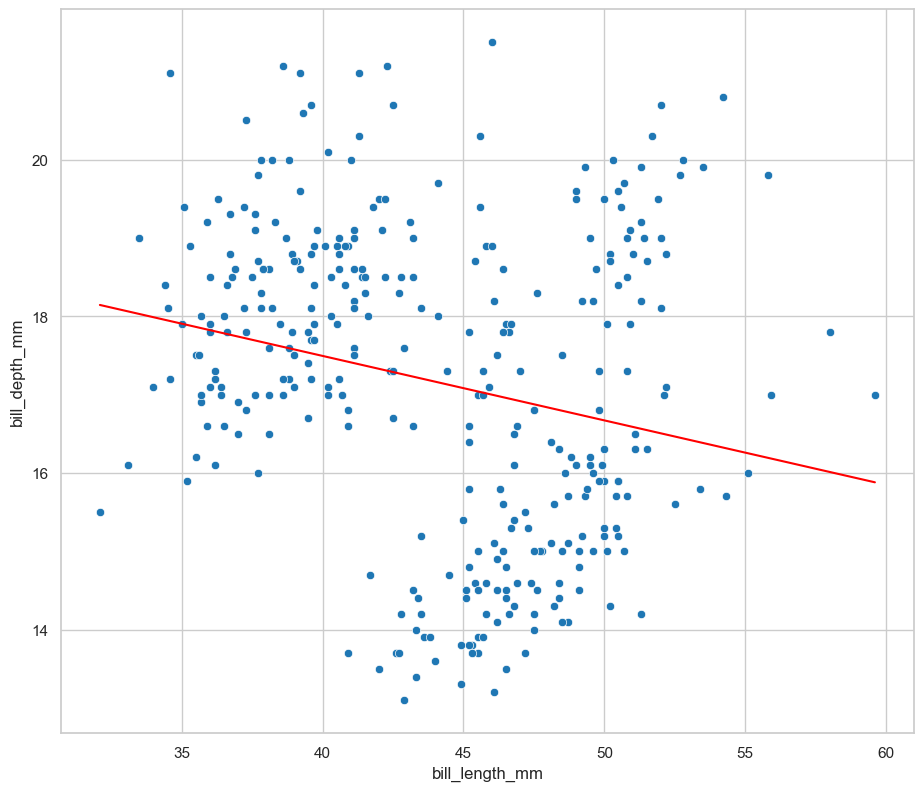

In [64]:
#Grafica de scatterplot
sns.scatterplot(
    data=preprocessed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

#Creando gráfica de la regresión lineal
xlineal_1 = np.array([preprocessed_penguins_df.bill_length_mm.min(),preprocessed_penguins_df.bill_length_mm.max()])
ylineal_1 = lin_par.intercept + lin_par.slope*xlineal_1
plt.plot(xlineal_1,ylineal_1,color='red')

Y nuevamente la interpretación es que para un cambio positivo en X hay un cambio negativo en Y.

Ahora pensemos, ¿realmente será así? Yo veo que existen otras formas en las que se comportan los datos.

Existen otras formas más sencillas de llevar a nuestra regresión lineal usando Seaborn.

### Regresión lineal con Seaborn

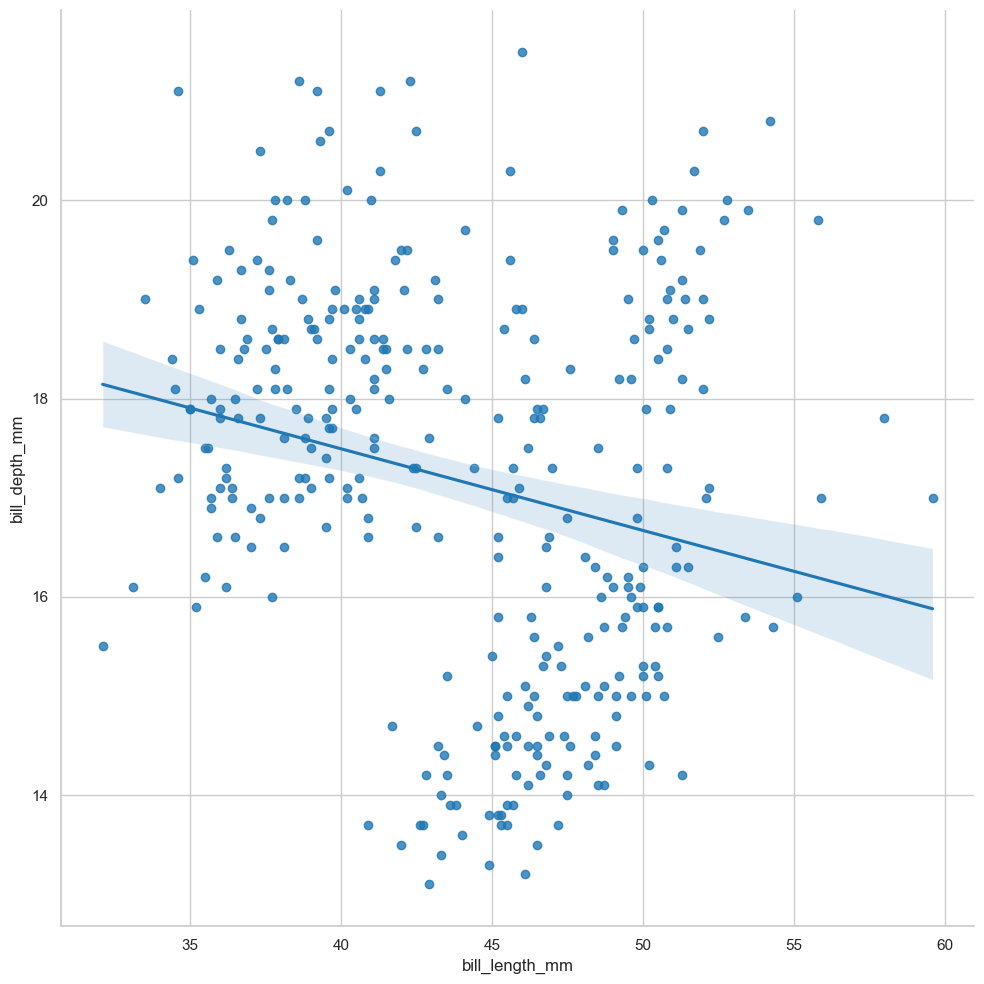

In [44]:
sns.lmplot(
    data=preprocessed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

Ahora es importante mencionar que Seaborn no te va a dar los parámetros, solo te dará la representación visual, es importante tener esto en cuenta, porque los valores de:
- intersección
- pendiente
- correlación (r)

No van a ser claros a primera vista, así que hay que saber obtenerlos de otras formas.

También en la gráfica anterior hay que ver que nos dibuja una zona en transparencia, esta zona es el **intervalo de confianza**, que nos dice que en ese lugar cae los valores de manera correcta.

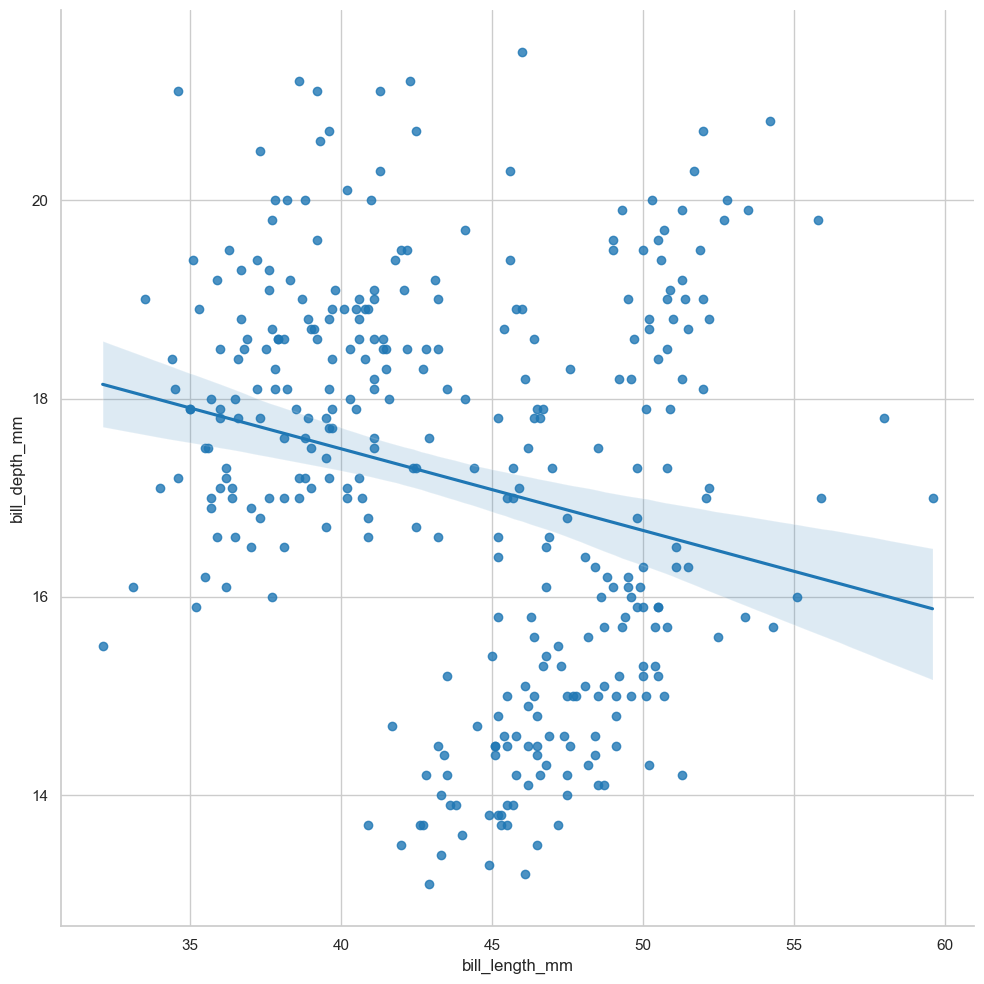

Esta gráfica nos quiere decir que a mayor longitud de pico, el valor en la profundidad del pico disminuye, o que a mayor profundidad de pico la longitud de pico disminuye.

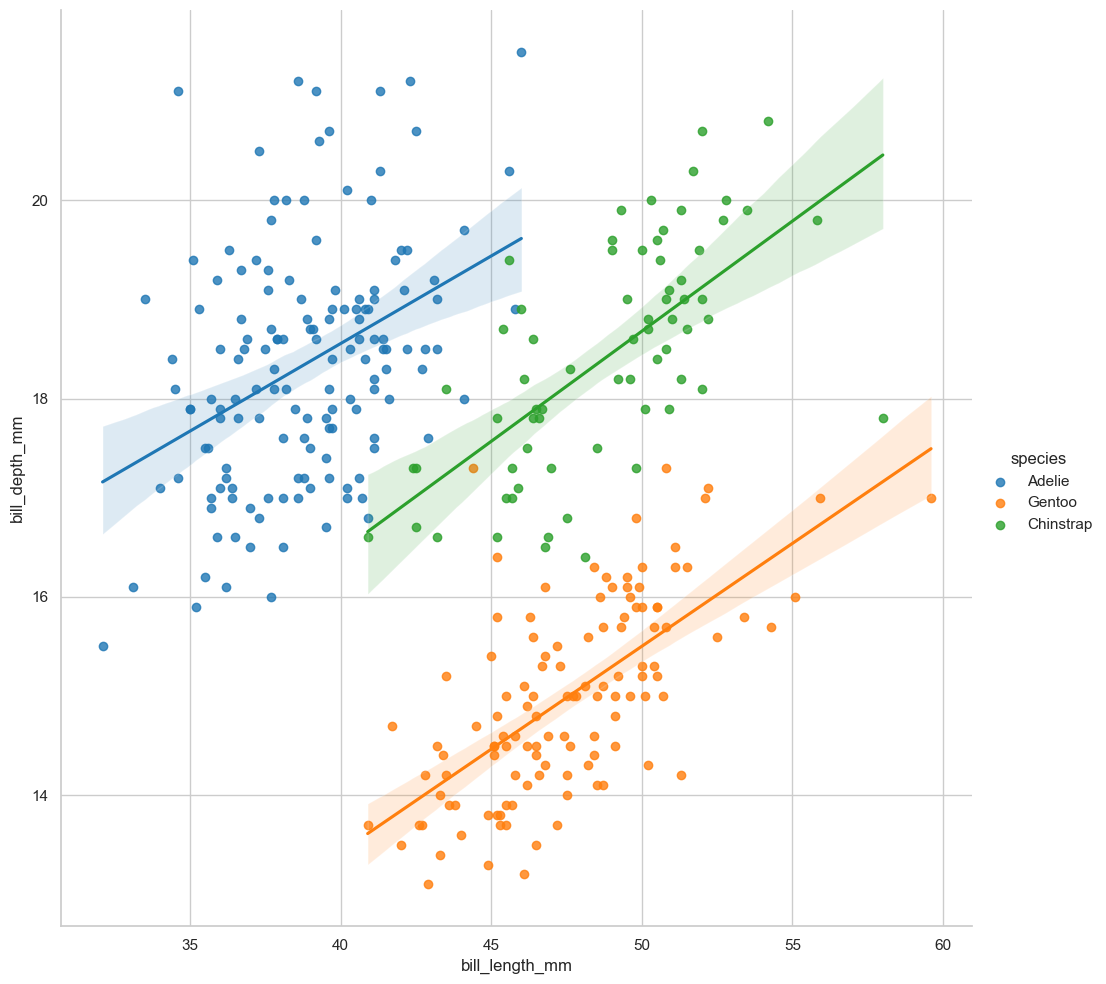

In [45]:
sns.lmplot(
    data=preprocessed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10
)

### Reto:
Toma 2 variables del set y compáralas, obtén sus parámetros de regresión lineal y da una interpretación.

In [46]:
for columna in preprocessed_penguins_df.columns:
    print(columna)

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
year


Escogí las siguientes 2 variables:
- flipper_length_mm
- body_mass_g

<AxesSubplot: xlabel='body_mass_g', ylabel='flipper_length_mm'>

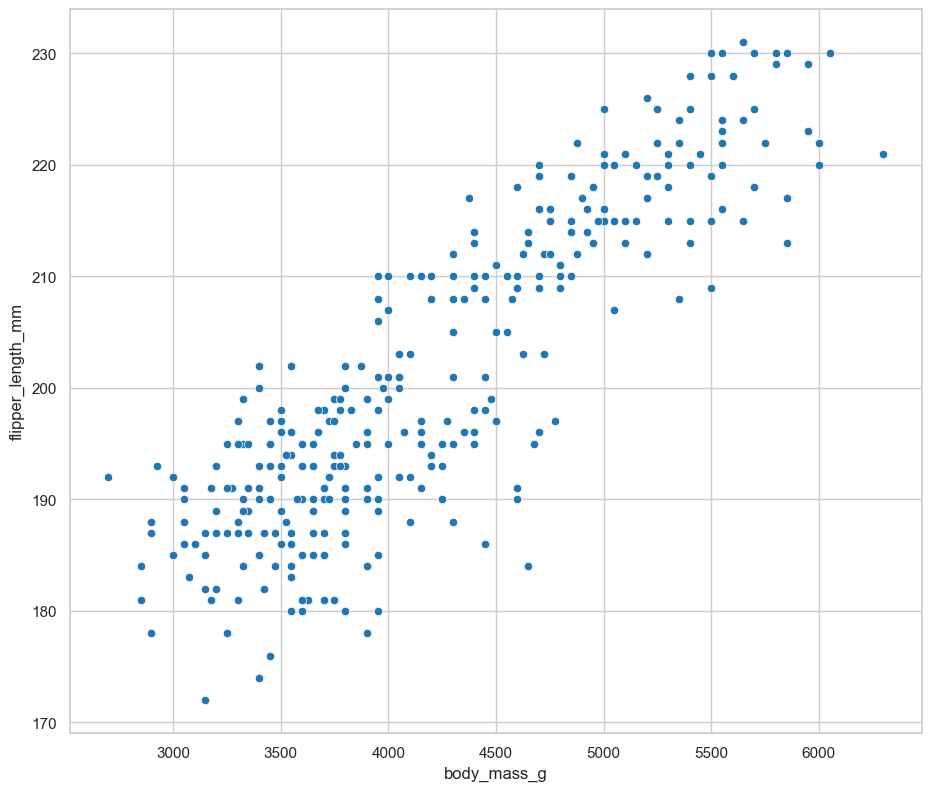

In [50]:
#Comparando 
# longitud aletas vs masa corporal
sns.scatterplot(
    data=preprocessed_penguins_df,
    x='body_mass_g',
    y='flipper_length_mm',
    #hue='species'
)

Al parecer tienen un factor de correlación grande, apoyémonos de la función para obtenerlo.

<AxesSubplot: xlabel='body_mass_g', ylabel='flipper_length_mm'>

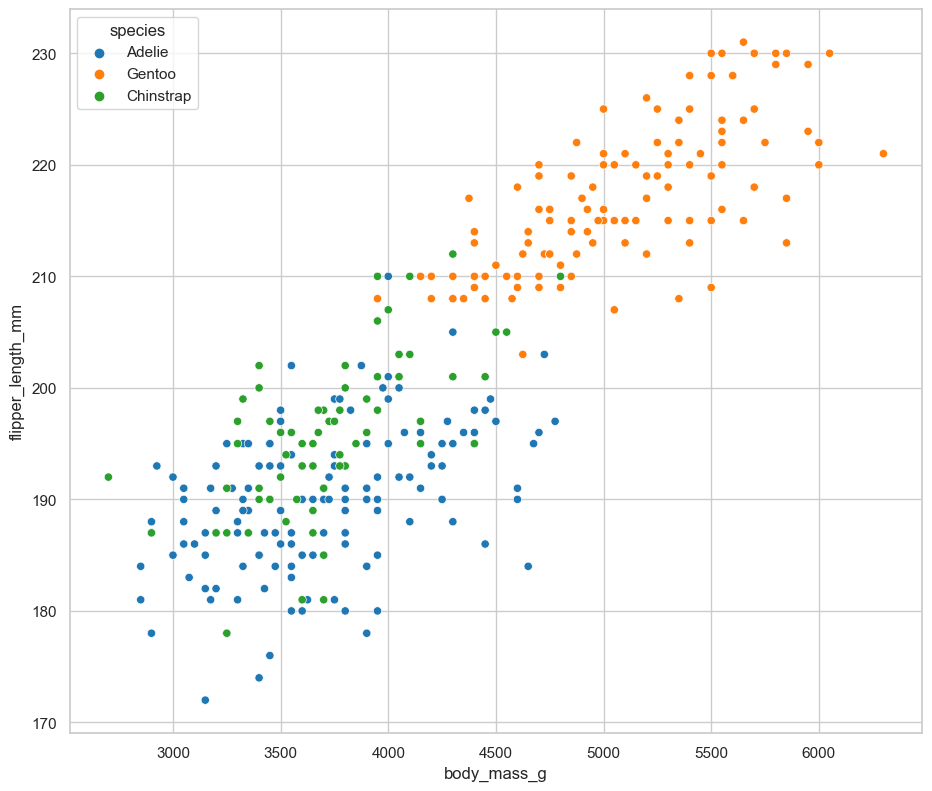

In [53]:
sns.scatterplot(
    data=preprocessed_penguins_df,
    x='body_mass_g',
    y='flipper_length_mm',
    hue='species'
)

Si hacemos una segmentación inclusive parece tener el mismo comportamiento, pero la dispersión de los datos es más notoria. Así que trabajaremos como un conjunto de datos; sin segmentación.

In [59]:
body_mass = np.array(preprocessed_penguins_df.body_mass_g)
flipper_length =np.array(preprocessed_penguins_df.flipper_length_mm)

In [60]:
np.corrcoef(body_mass,flipper_length)

array([[1.       , 0.8729789],
       [0.8729789, 1.       ]])

Como podemos observar el **factor de correlación** es 0.87, por lo que es un buen indicio de relación.

Ahora encontremos una ecuación que ajuste los datos.

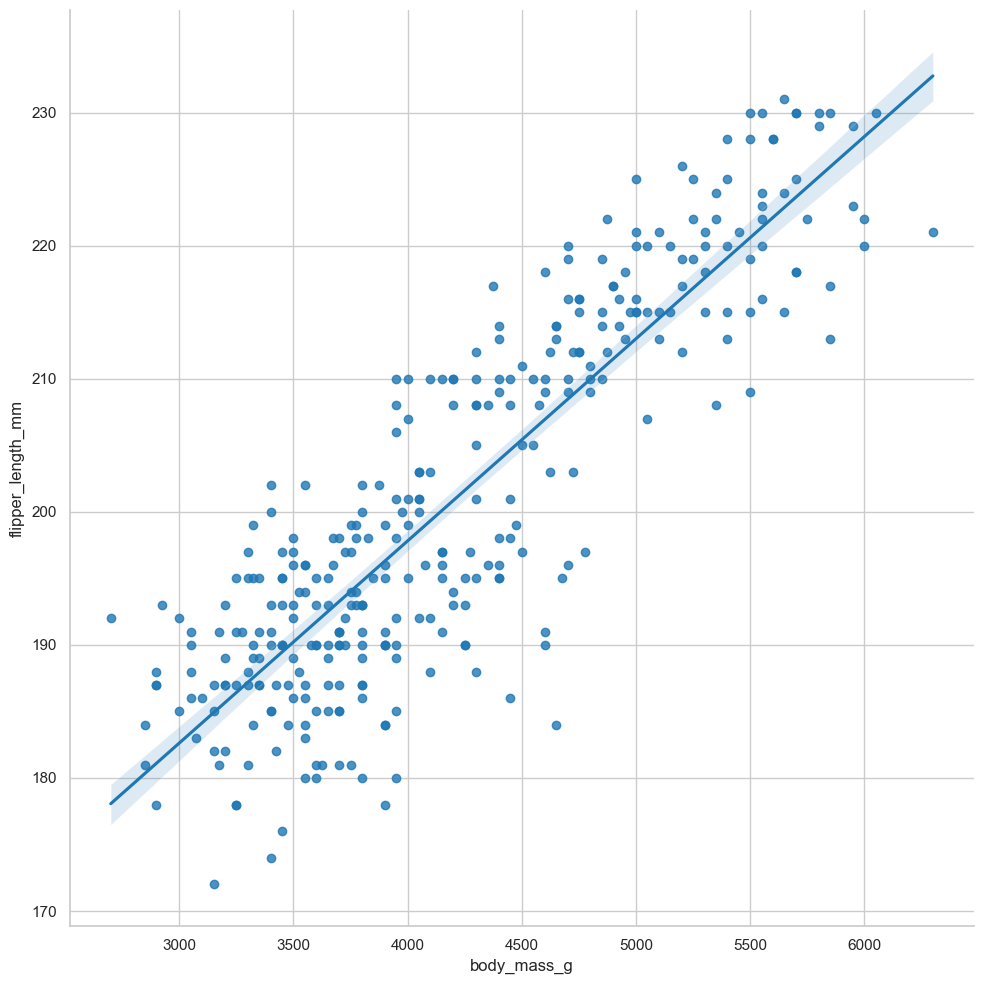

In [56]:
#Comparando 
# longitud aletas vs masa corporal
sns.lmplot(
    data=preprocessed_penguins_df,
    x='body_mass_g',
    y='flipper_length_mm',
    height=10
)

La hemos encontrado de manera gráfica, parece tener el comportamiento que esperamos, aunque **el rango de confiabilidad** de los datos es pequeño.

In [62]:
bodflip_lin = scipy.stats.linregress(
    x=body_mass,
    y=flipper_length
)
bodflip_lin

LinregressResult(slope=0.015195264815217666, intercept=137.03962089225467, rvalue=0.8729788985653611, pvalue=3.1328362509724443e-105, stderr=0.00046665391049053467, intercept_stderr=1.9987694290243148)

Una vez que hemos obtenido los datos de la regresión lineal hay que obtener los valores de la gráfica que describe el comportamiento.

In [65]:
x_lin2 = np.array([body_mass.min(),body_mass.max()])
y_lin2 = bodflip_lin.intercept + bodflip_lin.slope*x_lin2

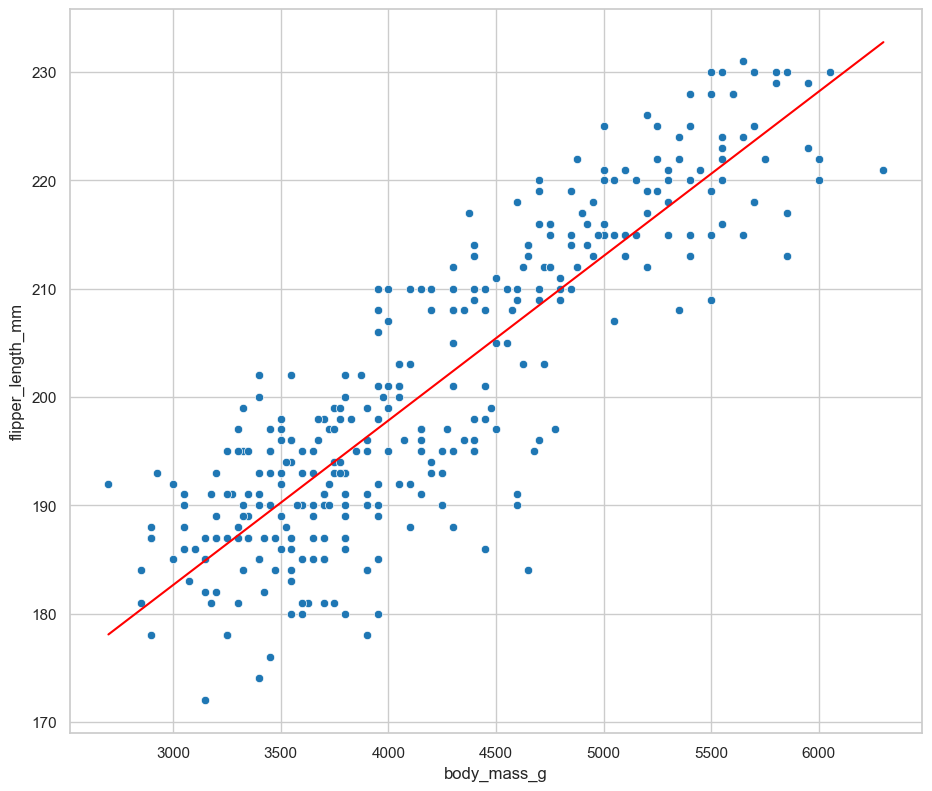

In [70]:
sns.scatterplot(
    data=preprocessed_penguins_df,
    x='body_mass_g',
    y='flipper_length_mm'
)

plt.plot(x_lin2,y_lin2,color='red')

Como se puede observar hay una correlación positiva y quiere decir que un aumento en la **masa corporal** esta relacionado en un aumento en la **longitud de la aleta**.

## Extras
- [¿Cuál es la matemática detrás de la regresión lineal?](https://platzi.com/blog/cual-es-la-matematica-detras-de-la-regresion-lineal/)
- [¿Qué es la regresión lineal?](https://platzi.com/home/clases/2739-regresion-lineal/46175-que-es-la-regresion-lineal/)